In [1]:
import math, time
import numpy as np                                                              # type: ignore
from PIL import Image, ImageDraw                                                # type: ignore
import IPython.display as display                                               # type: ignore
from engine import (
    WIDTH, HEIGHT,
    get_matrix_camera,
    get_screen_matrix,
    get_matrix_projection,
    process_polygon_3d,
    process_polygon_2d,
    check_valid_poligons,
    get_model_2d,
    get_model_3d,
    read_model,   
)

pygame 2.5.2 (SDL 2.28.2, Python 3.11.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
def run(faces, vertices):

    for i in range(1, 10):
        
        angle           = (math.pi / 4) * (i * 0.1)                             # angle for rotating the 3D model

        m_camera        = get_matrix_camera()                                   # [Matrix] Camera
        m_screen        = get_screen_matrix()                                   # [Matrix] Screen Projection 
        m_projection    = get_matrix_projection()                               # [Matrix] Projection

        vertices_3d     = process_polygon_3d(vertices, m_camera, angle)         # polygon + angle relative to the camera
        vertices_2d     = process_polygon_2d(vertices_3d, m_projection, m_screen) # separates X, Y coordinates (used to generate the image)
        
        polygons        = check_valid_poligons(faces, vertices_2d)              # checks if it is outside the camera's field of view
        
        polygons        = [list(map(tuple, p)) for p in polygons]               # cast to list

        image = Image.new("RGB", (WIDTH, HEIGHT), "black")                      # Black background
        draw = ImageDraw.Draw(image)

        [
            draw.polygon(p, outline="orange")
            for p in polygons
            if len(polygons) > 0
        ]

        display.clear_output(wait=True)                                         # Clears the previous output
        display.display(image)                                                  # Displays the new image
        time.sleep(1)                                                           # Update time


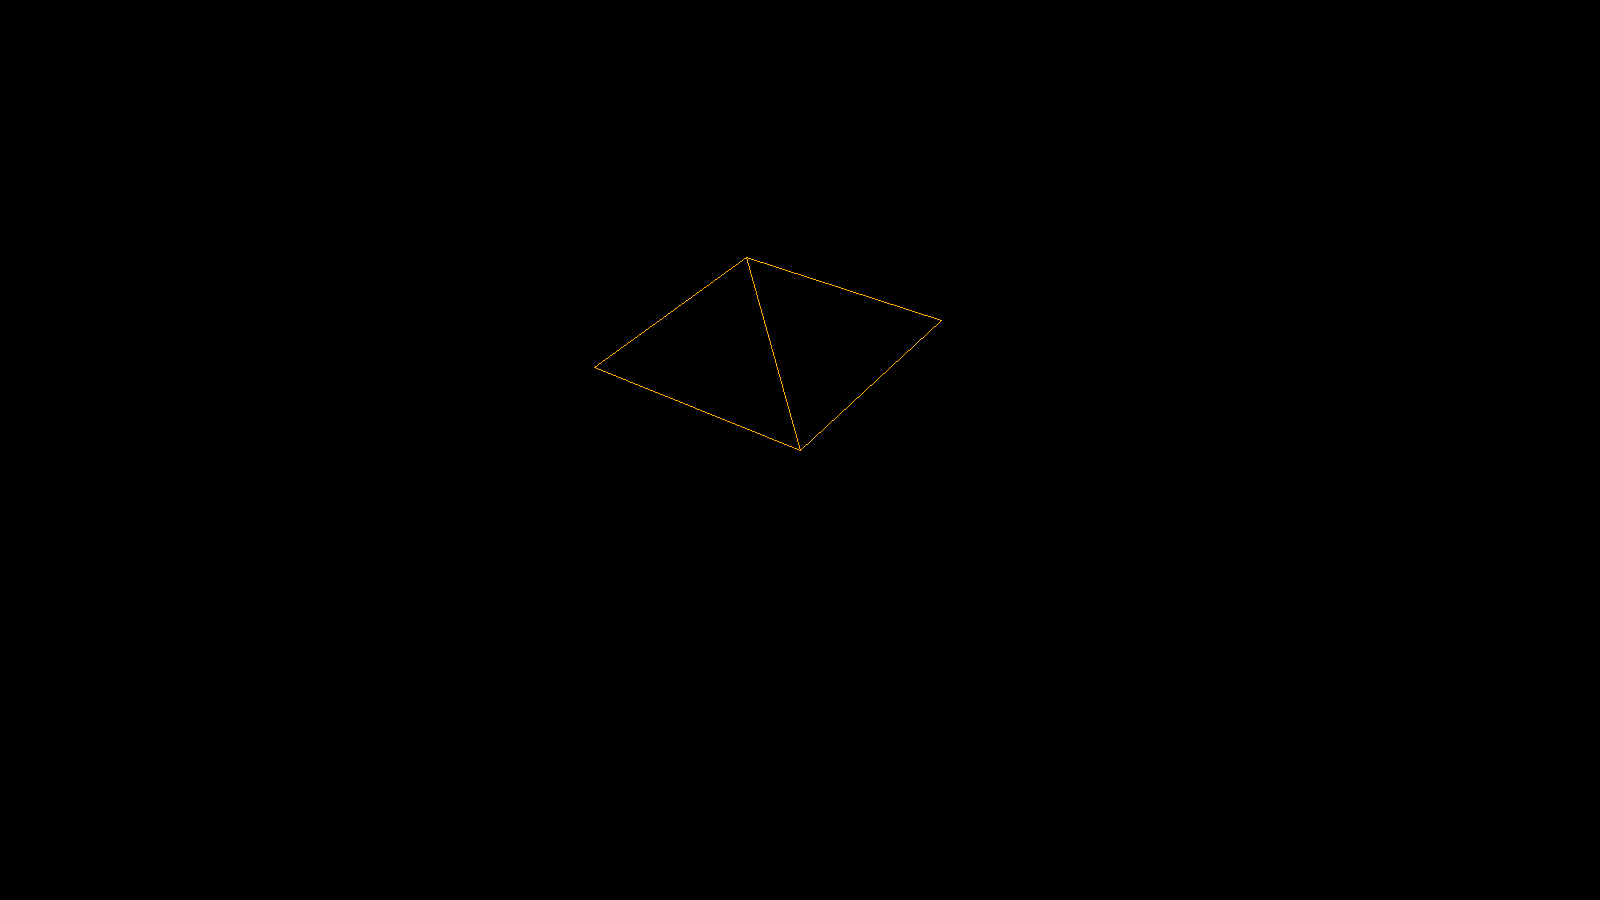

In [3]:
faces, vertices = get_model_2d()
run(faces, vertices)


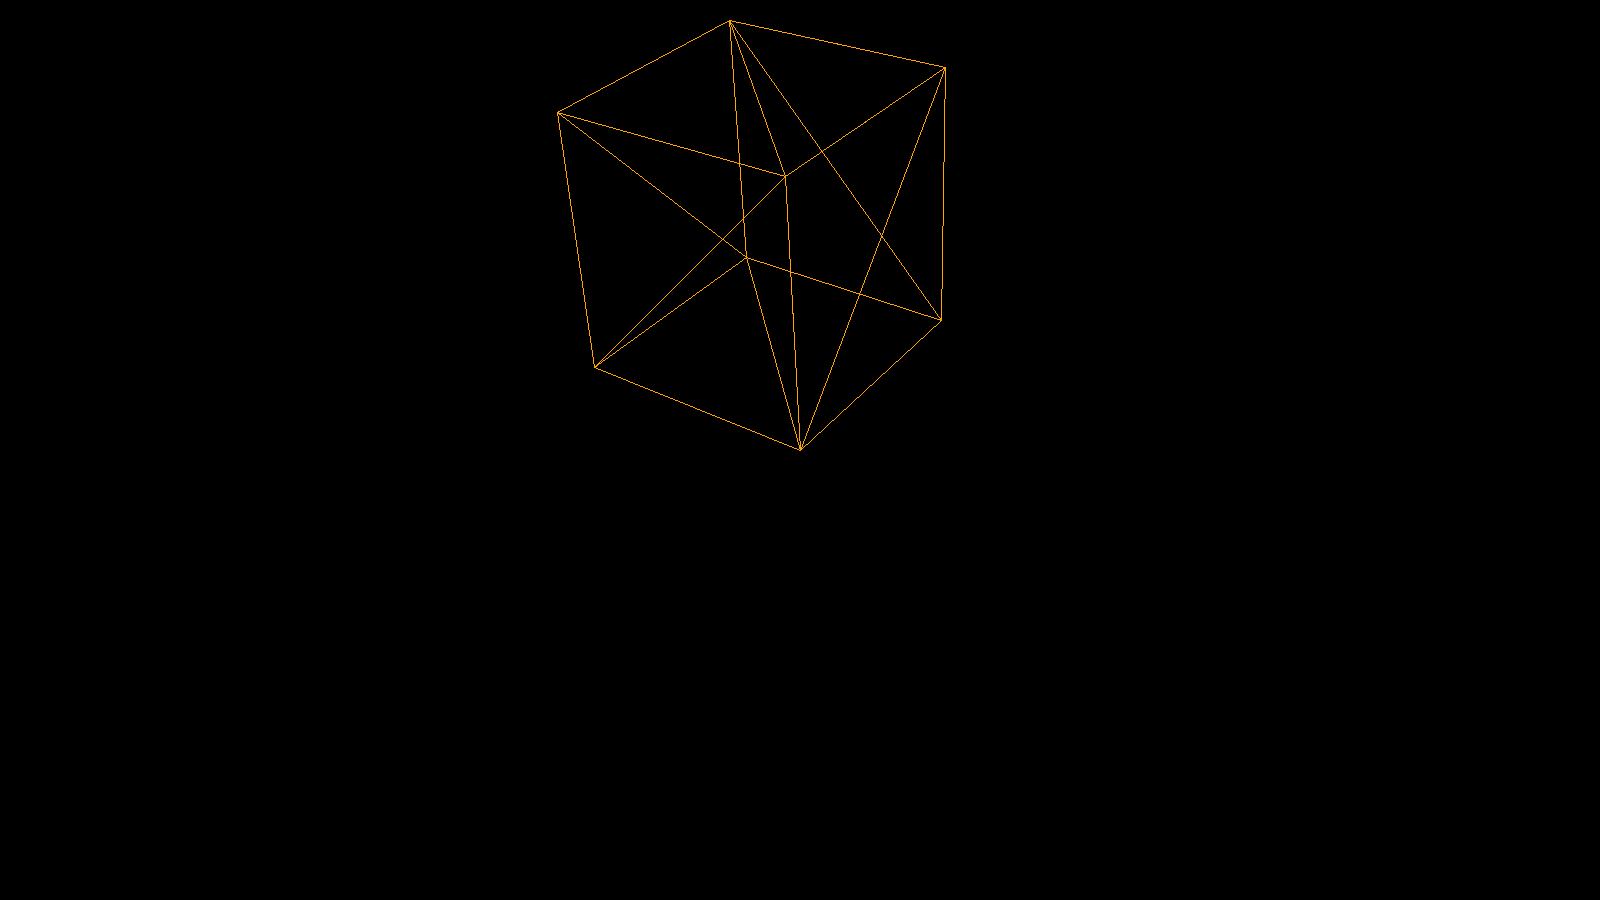

In [4]:
faces, vertices = get_model_3d()
run(faces, vertices)

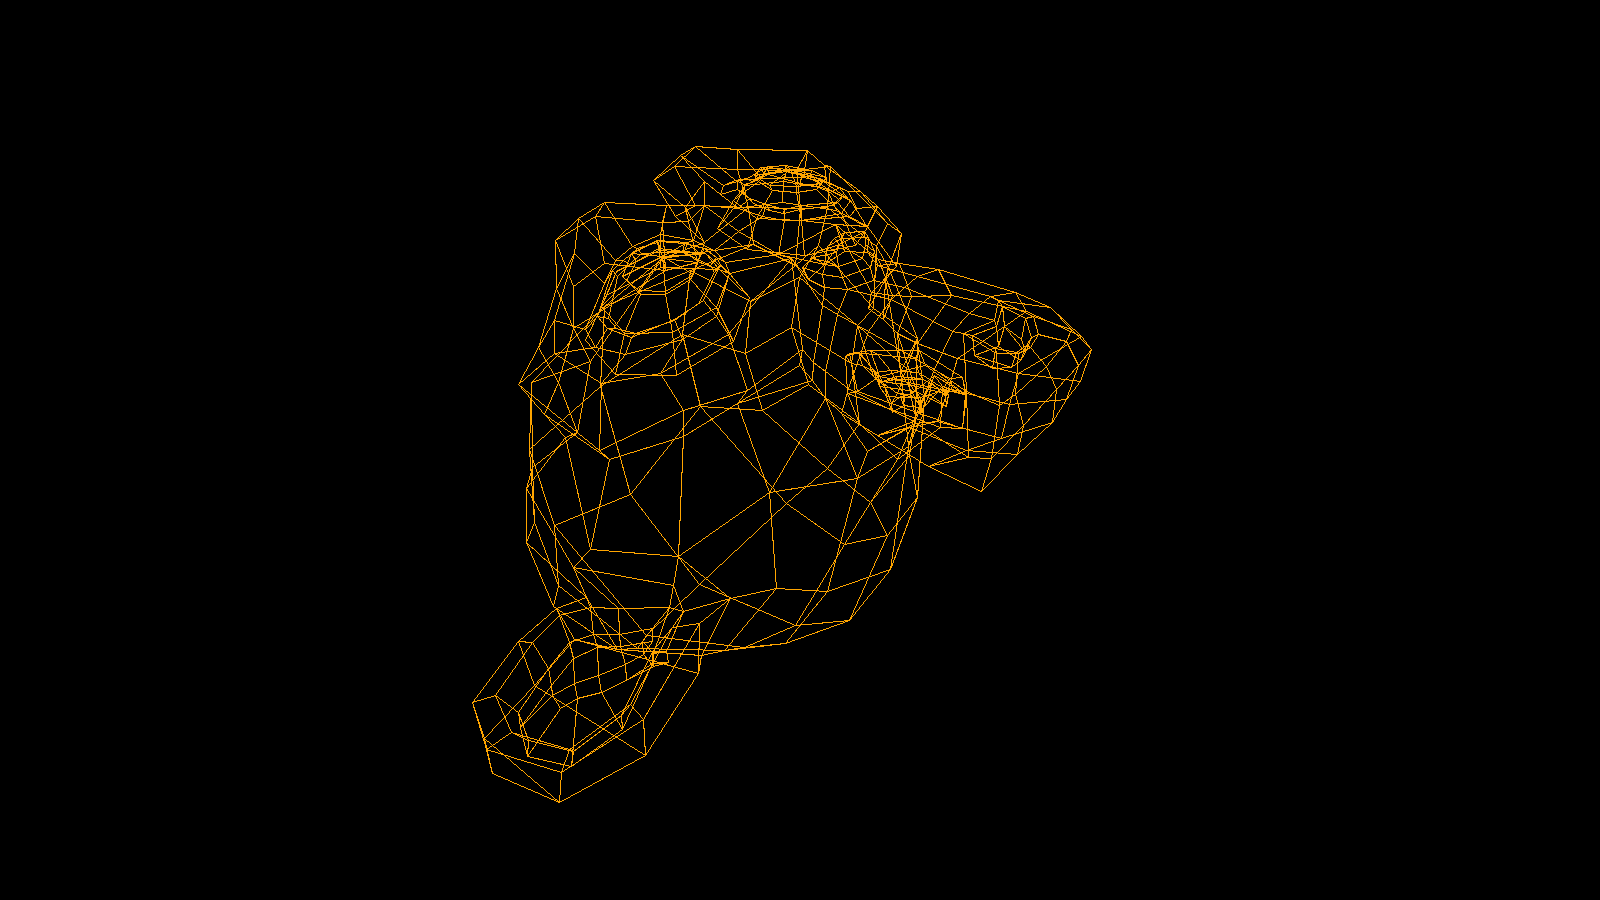

In [5]:
faces, vertices = read_model('suzanne')

print('[len]faces:'    , len(faces)   , 'fist_item:', len(faces[0])     )
print('[len]vertices:' , len(vertices), 'fist_item:', len(vertices[0])  )

run(faces, vertices)